In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/Users/shashanksingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shashanksingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
budget_threshold = 3000
df = pd.read_csv('final_dataset.csv')
df.tail()

,Trip_ID,Date,City,Vehicle_Type,Fuel_Type,Route,Distance_km,Load_Weight_kg,Total_Fuel_Cost,Petrol_Price,Diesel_Price,Temp_Mean_C,Precipitation_mm
96539,8465fc1d-7cff-42ec-a29e-723a71617283,2017-06-16,Mumbai,Van,Diesel,Route_A,1983.33,201.39,9916.77,76.7,59.9,28.1,10.0
96540,8e77d5b0-cc1f-407c-80e4-0aa920815714,2017-06-16,Mumbai,Van,Diesel,Route_C,1749.45,121.32,8741.51,76.7,59.9,28.1,10.0
96541,7463d0df-1a3d-4a0f-8632-ea69390da23a,2017-06-16,Mumbai,Truck,Diesel,Route_A,1017.07,9510.38,15046.45,76.7,59.9,28.1,10.0
96542,abb276cf-a4f2-4e23-a7a1-f27a5f131e28,2017-06-16,Mumbai,Truck,Diesel,Route_C,1313.09,3214.06,16811.48,76.7,59.9,28.1,10.0
96543,1676023c-7ece-4d0d-b5a6-cb2a830ced5d,2017-06-16,Mumbai,Van,Diesel,Route_A,1021.99,521.15,5123.69,76.7,59.9,28.1,10.0


In [3]:
y = (df['Total_Fuel_Cost'] > budget_threshold).astype(int)
X = df.drop(['Total_Fuel_Cost', 'Trip_ID', 'Date'], axis=1)

print(f"Created new target: 'Over_Budget'. Threshold = ₹{budget_threshold}")
print(f"Percentage of trips over budget: {y.mean() * 100:.2f}%")

Created new target: 'Over_Budget'. Threshold = ₹3000
Percentage of trips over budget: 81.22%


In [4]:
categorical_features = ['City', 'Vehicle_Type', 'Fuel_Type', 'Route']
numerical_features = X.drop(columns=categorical_features).columns
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [6]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.23%


In [8]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Under Budget (0)', 'Over Budget (1)']))


Classification Report:
                  precision    recall  f1-score   support

Under Budget (0)       0.96      0.95      0.95      3626
 Over Budget (1)       0.99      0.99      0.99     15683

        accuracy                           0.98     19309
       macro avg       0.97      0.97      0.97     19309
    weighted avg       0.98      0.98      0.98     19309




Confusion Matrix:


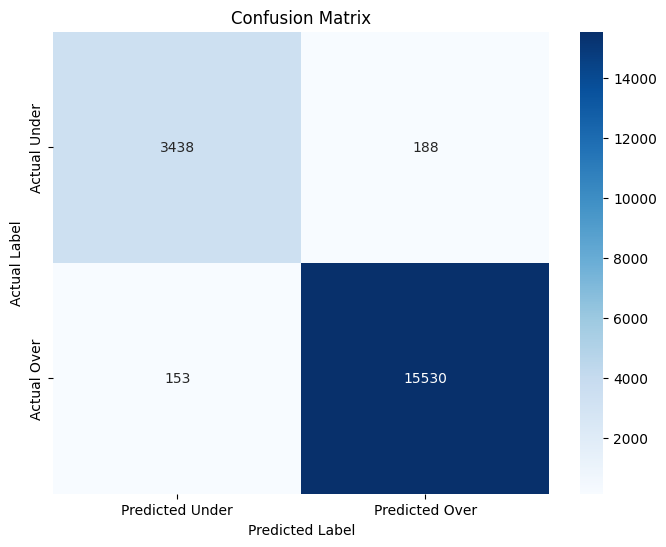

In [9]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Under', 'Predicted Over'], 
            yticklabels=['Actual Under', 'Actual Over'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [10]:
X_sample = X_test.iloc[6]
y_actual_cost = df.loc[X_sample.name]['Total_Fuel_Cost']
y_actual_status = y_test.iloc[0] # 0 or 1

prediction = model.predict(X_sample.to_frame().T)[0]
probabilities = model.predict_proba(X_sample.to_frame().T)[0]
prob_over_budget = probabilities[1]

print(f"Trip Details: \n{X_sample}\n")
print(f"Actual Trip Cost:       ₹{y_actual_cost:.2f}")
print(f"Budget Threshold:       ₹{budget_threshold}")
print(f"Actual Status:          {'Over Budget' if y_actual_status == 1 else 'Under Budget'}")
print("---")
print("Model's Prediction Report:")
print(f"Probability of 'Over Budget': {prob_over_budget * 100:.2f}%")
print(f"Final Decision (Prediction):  {'Over Budget' if prediction == 1 else 'Under Budget'}")
print("---")

if prediction == y_actual_status:
    print("Result: The model's prediction was CORRECT. ✅")
else:
    print("Result: The model's prediction was INCORRECT. ❌")

Trip Details: 
City                  Mumbai
Vehicle_Type           Truck
Fuel_Type             Diesel
Route                Route_B
Distance_km           954.91
Load_Weight_kg      13204.22
Petrol_Price          107.54
Diesel_Price           97.45
Temp_Mean_C             27.0
Precipitation_mm        22.4
Name: 49400, dtype: object

Actual Trip Cost:       ₹25289.85
Budget Threshold:       ₹3000
Actual Status:          Over Budget
---
Model's Prediction Report:
Probability of 'Over Budget': 100.00%
Final Decision (Prediction):  Over Budget
---
Result: The model's prediction was CORRECT. ✅


In [11]:
X_sample = X_test.iloc[0]
X_sample

City                  Delhi
Vehicle_Type            Van
Fuel_Type            Diesel
Route               Route_A
Distance_km          721.03
Load_Weight_kg       465.38
Petrol_Price          94.72
Diesel_Price          87.62
Temp_Mean_C            29.7
Precipitation_mm        0.1
Name: 13193, dtype: object

In [12]:
import joblib
joblib.dump(model, 'Classification-model.pkl')

['Classification-model.pkl']